<a href="https://colab.research.google.com/github/BernieT7/ML/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv"
data = pd.read_csv(url)
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [ ]:
data["Gender"] = data["Gender"].map({"男生": 1, "女生": 0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x = data[["Age",	"Weight",	"BloodSugar",	"Gender"]]
y = data["Diabetes"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
import numpy as np
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
import numpy as np
w = np.array([0, 0, 0, 0])
b = 1
y = (w*x_train).sum(axis=1) + b
sigmoid(y)

array([0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.73105858, 0.73105858, 0.73105858, 0.73105858, 0.73105

In [ ]:
def compute_cost(x, y, w, b):
  z = (w*x).sum(axis=1) + b
  y_pred = sigmoid(z)
  cost = -y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
  cost = cost.mean()
  return cost

In [ ]:
w = np.array([0, 0, 0, 0])
b = 1
compute_cost(x_train, y_train, w, b)

0.9945116875182227

In [ ]:
def compute_gradient(x, y, w, b):
  z = (w*x).sum(axis=1) + b
  y_pred = sigmoid(z)
  ws_grad = np.zeros(x.shape[1])
  b_grad = (y_pred - y).mean()
  for i in range(x.shape[1]):
    ws_grad[i] = (x[:, i]*(y_pred - y)).mean()

  return ws_grad, b_grad

In [ ]:
w = np.array([0, 0, 0, 0])
b = 1
compute_gradient(x_train, y_train, w, b)

(array([-0.02073289, -0.14964032, -0.33872896,  0.00117417]),
 0.41230857863000486)

In [ ]:
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, iter_time, per_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(iter_time):
    w_gradient, b_gradient = gradient_function(x, y, w, b)
    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if (i % per_iter) == 0:
      print(f"Iteration {i:5}: Cost{cost: .4e}, where w={w}, b={b: .2e}, w_gradient={w_gradient}, b_gradient={b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [ ]:
w_init = np.array([1, 2, 2, 4])
b_init = 5
learning_rate = 0.01
iter_time = 10000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, iter_time)

Iteration     0: Cost 2.9893e+00, where w=[0.99971354 1.99999595 2.00203943 3.99795906], b= 5.00e+00, w_gradient=[ 0.02864585  0.00040509 -0.20394277  0.20409441], b_gradient= 4.79e-01
Iteration  1000: Cost 9.6294e-01, where w=[0.62288382 1.50816546 3.13457624 2.03606725], b= 1.26e+00, w_gradient=[ 0.04384202  0.08544299 -0.03378459  0.15990829], b_gradient= 2.69e-01
Iteration  2000: Cost 3.7987e-01, where w=[0.22379091 0.71556109 3.16928448 0.861096  ], b=-5.81e-01, w_gradient=[0.03340097 0.06425401 0.00959126 0.0806436 ], b_gradient= 1.14e-01
Iteration  3000: Cost 2.6322e-01, where w=[-0.01204939  0.25669657  3.12249248  0.30441886], b=-1.30e+00, w_gradient=[ 0.01463468  0.02955182 -0.00217039  0.03547118], b_gradient= 4.07e-02
Iteration  4000: Cost 2.4478e-01, where w=[-0.10522625  0.06268002  3.19538786  0.07105614], b=-1.55e+00, w_gradient=[ 0.0055635   0.01205268 -0.01078666  0.01431482], b_gradient= 1.55e-02
Iteration  5000: Cost 2.4025e-01, where w=[-0.14275694 -0.02115408  3.3

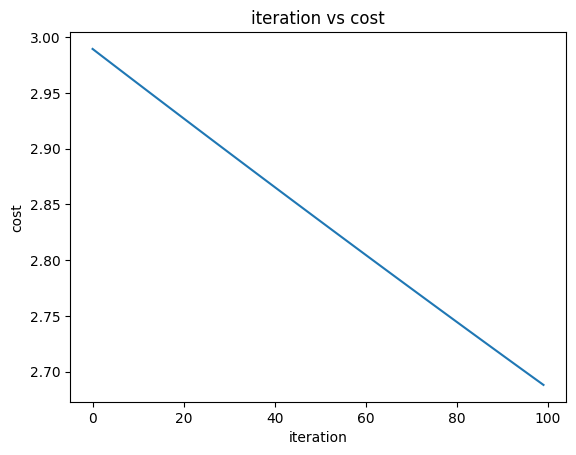

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0, 100), c_hist[:100])
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

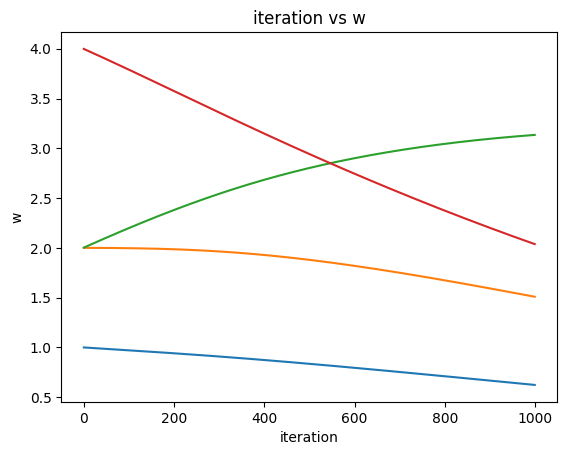

In [ ]:
plt.plot(np.arange(0, 1000), w_hist[:1000])
plt.title("iteration vs w")
plt.xlabel("iteration")
plt.ylabel("w")
plt.show()

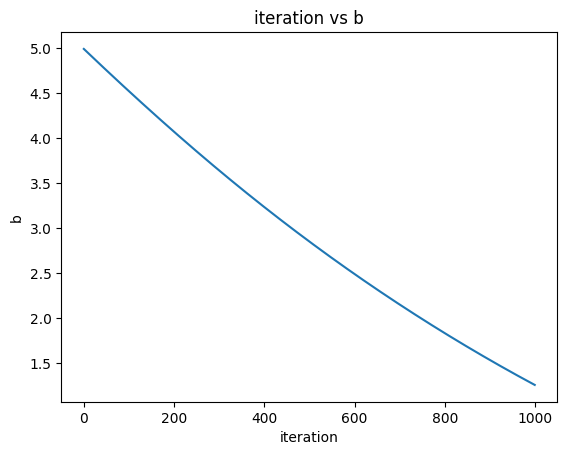

In [ ]:
plt.plot(np.arange(0, 1000), b_hist[:1000])
plt.title("iteration vs b")
plt.xlabel("iteration")
plt.ylabel("b")
plt.show()

In [ ]:
z = (w_final*x_test).sum(axis=1) + b_final
y_pred = sigmoid(z)
y_pred = np.where(y_pred>0.5, 1, 0)
acc = (y_pred==y_test).sum() / len(y_test) * 100
print(f"正確率 {acc}%")

正確率 90.0%


In [ ]:
# 72 92 102 女生
# 62 52 120 男生
x_real = np.array([[72, 92, 102, 0], [62, 52, 120, 1]])
x_real = scaler.transform(x_real)
z = (w_final*x_real).sum(axis=1) + b_final
y_real = sigmoid(z)
y_real

array([0.07246157, 0.64423506])